In [1]:
import os
import sys
PATH = os.getcwd()
DIR_DATA = PATH + '{0}data{0}'.format(os.sep)
sys.path.append(PATH) if PATH not in list(sys.path) else None
DIR_DATA

'C:\\Users\\epuerta\\OneDrive - Universidad Tecnológica de Bolívar\\Apps\\courseNLP\\examples\\data\\'

# Paso 1: Cargar librerías y el dataset

Importamos las librerías necesarias y cargamos el dataset

In [2]:
import pandas as pd

In [3]:
# Cargar dataset
df = pd.read_csv(DIR_DATA + 'dataset_reseñas_espanol.csv', sep=',')

In [4]:
# Verificar primeras filas
print(df.head())


                                              Reseña Sentimiento
0                         Muy entretenida y emotiva.    Positiva
1              Pésimas actuaciones y un ritmo lento.    Negativa
2              Gran dirección y un guion muy sólido.    Positiva
3              Pésimas actuaciones y un ritmo lento.    Negativa
4  Una historia conmovedora con actuaciones autén...    Positiva


In [5]:
# Verificar nombres de columnas
print(df.columns)

Index(['Reseña', 'Sentimiento'], dtype='object')


# Paso 2: Limpiar nombres de columnas y preparar variables

In [6]:
# Limpiar encabezados por si tienen espacios en blanco
df.columns = df.columns.str.strip().str.lower()

In [7]:
# Verificar nombres de columnas corregidos
print(df.columns)

Index(['reseña', 'sentimiento'], dtype='object')


In [8]:
# Separar características y etiquetas
X = df['reseña']
y = df['sentimiento'].str.lower().map({'positiva': 1, 'negativa': 0})

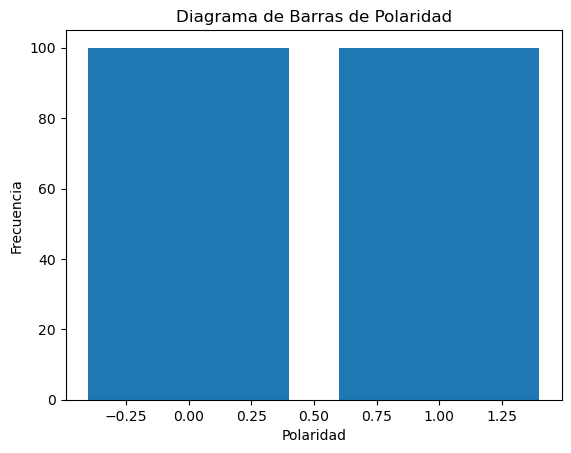

In [9]:
import matplotlib.pyplot as plt

# Contar las frecuencias de cada valor en la columna 'Polarity'
polarity_counts = y.value_counts().sort_index()

# Crear el gráfico de barras
plt.bar(polarity_counts.index, polarity_counts.values)

# Agregar un título al gráfico
plt.title('Diagrama de Barras de Polaridad')

# Etiquetas para los ejes
plt.xlabel('Polaridad')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

# Paso 3: Dividir en entrenamiento y prueba

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Paso 4: Vectorización de texto con TF-IDF (en español)

In [11]:
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
# Stopwords en español
stopwords_es = stopwords.words('spanish')

In [13]:
stopwords_es

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [14]:
# Crear vectorizador
vectorizer = TfidfVectorizer(stop_words=stopwords_es)

In [15]:
# Aplicar vectorización
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Paso 5: Entrenar tres clasificadores

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [17]:
# Naive Bayes
nb = MultinomialNB().fit(X_train_tfidf, y_train)
# Regresión Logística
lr = LogisticRegression(max_iter=200).fit(X_train_tfidf, y_train)
# SVM Lineal
svm = LinearSVC().fit(X_train_tfidf, y_train)

# Paso 6: Evaluación de los modelos

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [19]:
# Predicciones
y_pred = nb.predict(X_test_tfidf)

In [20]:
# Reporte de métricas
print("Reporte de Clasificación (Naive Bayes):")
print(classification_report(y_test, y_pred))

Reporte de Clasificación (Naive Bayes):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



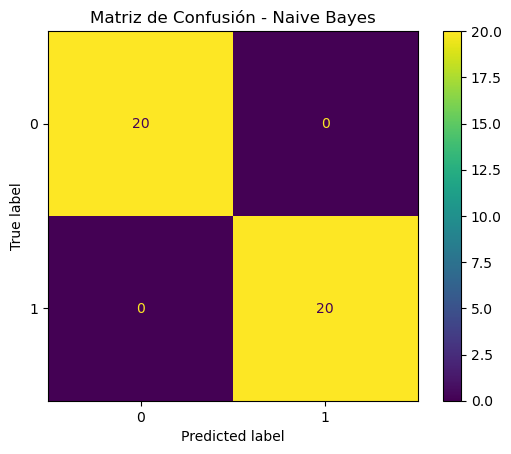

In [38]:
# Matriz de confusión
disp = ConfusionMatrixDisplay.from_estimator(nb, X_test_tfidf, y_test)
plt.title("Matriz de Confusión - Naive Bayes")
plt.show()